## What Happens To the Consumption Function When A Liquidity Constraint is Tightened?

[![badge](https://img.shields.io/badge/Launch%20using%20-Econ--ARK-blue)](https://econ-ark.org/materials/changeliqconstr#launch)

(This example builds on the ConsIndShockModel notebook; digest that before proceeding)

The `KinkedRconsumerType` class solves the problem of a consumer for whom the interest rate on borrowing is higher than the rate that the consumer will receive on any positive saving they do.  The default calibration is meant to capture a case where the borrowing occurs at an interest rate typical of credit cards.

(Fuller discussion of the issues here can be found in [A Theory of the Consumption Function, With or Without Liquidity Constraints](http://www.econ2.jhu.edu/people/ccarroll/ATheoryv3JEP.pdf))

In [1]:
import matplotlib.pyplot as plt
from copy import deepcopy
from HARK.ConsumptionSaving.ConsIndShockModel import KinkedRconsumerType
from HARK.utilities import plot_funcs


def mystr(number):
    return "{:.4f}".format(number)

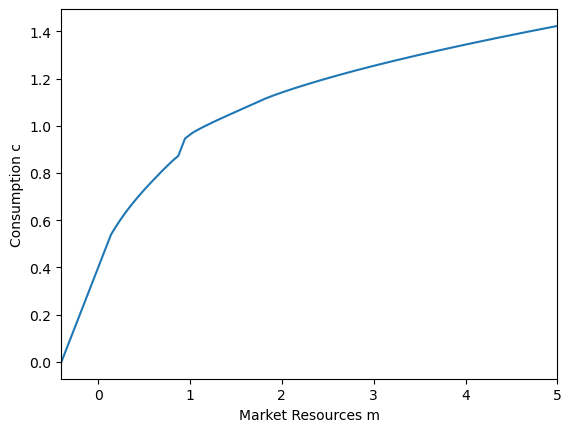

In [2]:
# Create an instance of the type of consumer we are interested in
KinkyExample = KinkedRconsumerType()

# Make the example infinite horizon (not a life cycle model)
KinkyExample.cycles = 0

# The consumer cannot borrow more than 0.4 times their permanent income
KinkyExample.BoroCnstArt = -0.4

# Solve the consumer's problem
KinkyExample.solve()

# Plot the results
plt.ylabel("Consumption c")
plt.xlabel("Market Resources m")
plot_funcs([KinkyExample.solution[0].cFunc], KinkyExample.solution[0].mNrmMin, 5)

'Market Resources' $M$ is the total amount of money (assets plus current income) available to the consumer when the consumption decision is made.  Lower case $m = M/P$ is the ratio of $M$ to permanent income.  Likewise, $c = C/P$ is the ratio of consumption to permanent income.

The line segment near $m=1$ captures the interval over which the consumer spends all of their market resources, because it's not worth it to borrow at the high credit card interest rate, but also not worth it to save at the low bank account interest rate.

The bottommost point on the consumption function is at $m=-0.4$, where consumption is zero.  This consumer would like to borrow to finance spending out of future income, but is already at the maximum borrowing limit.

The consumption function has a linear portion with a slope of 45 degrees along which the marginal propensity to consume out of extra market resources is 1.  But eventually resources get high enough that the consumer is willing to spend less than the maximum possible amount; this concave part of the consumption function terminates at the point where the consumer's desired borrowing reaches zero: The bottommost point on the line segment discussed above.

### Solution With A Tighter Constraint

We are now interested in the solution to the problem when the constraint is tighter; concretely, the maximum amount of borrowing allowed is now 0.2, rather than 0.4.


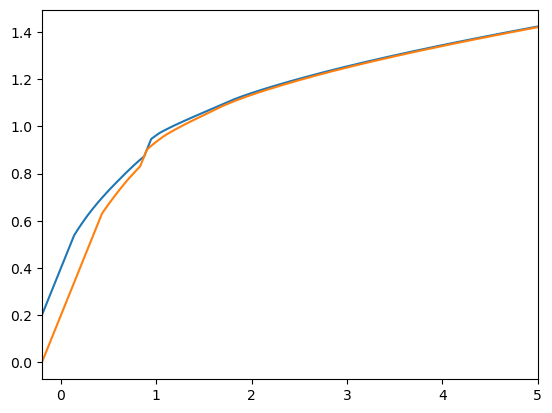

In [3]:
# Make a copy of the example consumer
KinkyExampleTighten = deepcopy(KinkyExample)

# Now change the location of the borrowing constraint -- the consumer cannot borrow more than 0.2
KinkyExampleTighten.BoroCnstArt = -0.2

# Solve the modified problem
KinkyExampleTighten.solve()

# Compare the two functions
plot_funcs(
    [KinkyExample.solution[0].cFunc, KinkyExampleTighten.solution[0].cFunc],
    KinkyExampleTighten.solution[0].mNrmMin,
    5,
)

### Discussion

The interesting question that this analysis does not address is how to handle the transition from a looser to a tighter constraint.

The toolkit can simulate a population of households behaving according to the first rule.  But it is not obvious how to treat consumers whose debt, say, was 0.3 before the constraint was tightened.  A simple, but implausible, approach is to assume that such consumer must immediately cut their consumption by enough to reduce their debt to the new more stringent maximum.  A reasonable solution might be to say that the new tighter constraint applies only to new borrowers; different papers in the literature take different approaches to this transition question.